In [1]:
!pip install tensorflow==2.16.1 numpy==1.26.4 scikit-learn==1.4.2 scipy==1.13.0 matplotlib==3.8.3

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.m

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, EfficientNetB3, InceptionV3, InceptionResNetV2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import numpy as np

In [3]:

data_dir = "OCT"
train_path= 'OCT/train/'
val_path= 'OCT/val/'
test_path= 'OCT/test/'
img_width, img_height = 150, 150
channels = 3
batch_size = 32

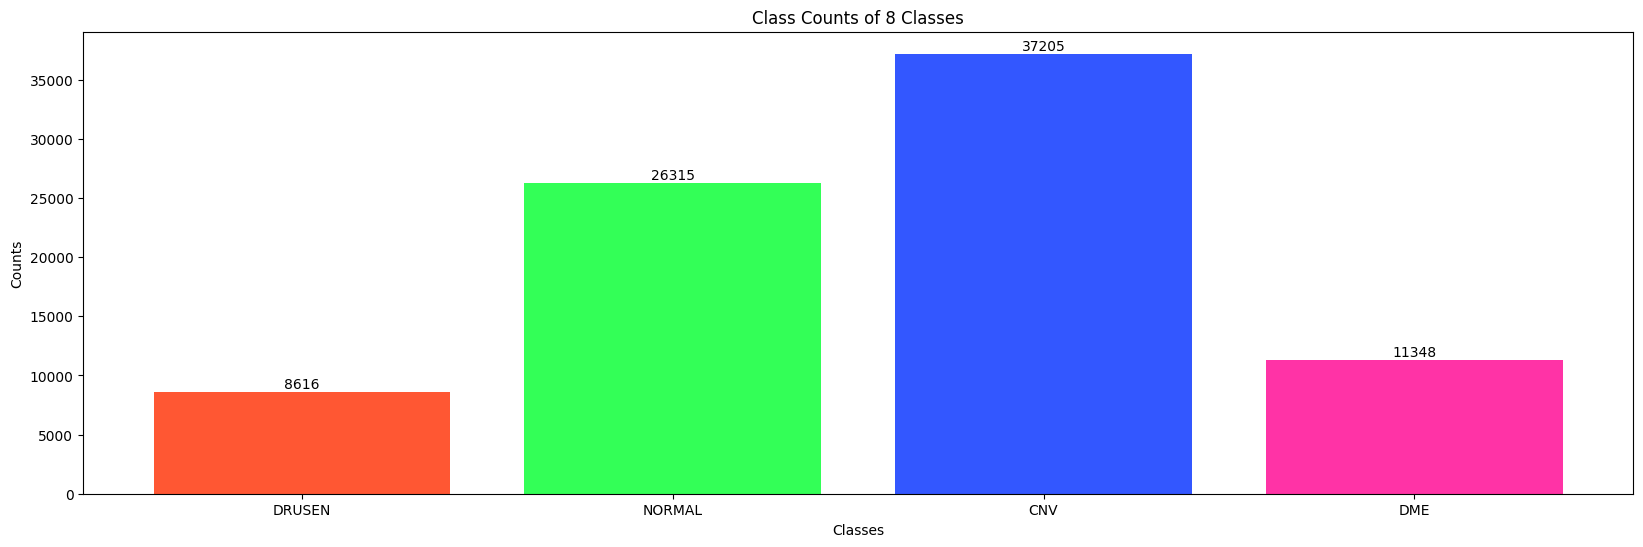

In [ ]:
data_path = 'OCT/train'
classes = os.listdir(data_path) # names of folders are the names of classes
class_counts = [len(os.listdir(data_path + '/' + x)) for x in classes] # length of respective classes is the count of images available for the respective class
#print(class_counts)
plt.figure(figsize=(20, 6))
bars = plt.bar(classes, class_counts, color = ['#FF5733', '#33FF57', '#3357FF', '#FF33A6', '#FF8633']) # 5 random colors chosen for better visualisation
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Class Counts of 8 Classes')
# Code to display count of each class on top of respective bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height}', 
        ha='center', 
        va='bottom'
    )

In [4]:
input_shape = (224,224)
train_generator = ImageDataGenerator(
    horizontal_flip = True, 
#     rotation_range=30, 
#     zoom_range=0.2,
    rescale=1/255,
    fill_mode='nearest'
)

test_generator = ImageDataGenerator(
    rescale=1/255,
    fill_mode='nearest'
)

train_image_generator = train_generator.flow_from_directory(
    train_path,
    target_size=input_shape,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

test_image_generator = test_generator.flow_from_directory(
    test_path,
    target_size=input_shape,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

Found 83484 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [5]:
base_model_0 = InceptionResNetV2(
    input_shape=(224, 224, 3), 
    include_top=False,             
    weights='imagenet',
    pooling='max'
) 

for layer in base_model_0.layers:
    layer.trainable = False

# Build model
inputs = base_model_0.input
x = BatchNormalization()(base_model_0.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(4, activation='softmax')(x)
model_0 = Model(inputs=inputs, outputs=outputs)

# Compile model
model_0.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Deal with class imbalances
class_weights = compute_class_weight(class_weight='balanced', classes = np.unique(train_image_generator.classes), y= train_image_generator.classes)
class_weight_dict = dict(enumerate(class_weights))

I0000 00:00:1724555104.517353    2390 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724555104.808216    2390 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724555104.811956    2390 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724555104.820777    2390 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [14]:
history = model_0.fit(
    train_image_generator,
    epochs=50,
    steps_per_epoch=327,
    validation_data=test_image_generator,
    class_weight=class_weight_dict
)

Epoch 1/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 92ms/step - accuracy: 0.8882 - loss: 0.3133 - val_accuracy: 0.9525 - val_loss: 0.1634
Epoch 2/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.8812 - loss: 0.3505 - val_accuracy: 0.9659 - val_loss: 0.1238
Epoch 3/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.8947 - loss: 0.3213 - val_accuracy: 0.9628 - val_loss: 0.1247
Epoch 4/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.8907 - loss: 0.3164 - val_accuracy: 0.9514 - val_loss: 0.1557
Epoch 5/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.8923 - loss: 0.3250 - val_accuracy: 0.9494 - val_loss: 0.1420
Epoch 6/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.8896 - loss: 0.3245 - val_accuracy: 0.9556 - val_loss: 0.1230
Epoch 7/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.8978 - loss: 0.2855 - val_accuracy: 0.9649 - val_loss: 0.1150
Epoch 8/50
320/327 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8926 - loss: 0.3012

/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.8926 - loss: 0.3013 - val_accuracy: 0.9628 - val_loss: 0.1164
Epoch 9/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 92ms/step - accuracy: 0.8881 - loss: 0.3139 - val_accuracy: 0.9628 - val_loss: 0.1295
Epoch 10/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.8941 - loss: 0.3098 - val_accuracy: 0.9659 - val_loss: 0.1015
Epoch 11/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.8902 - loss: 0.3163 - val_accuracy: 0.9731 - val_loss: 0.1088
Epoch 12/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.8965 - loss: 0.3057 - val_accuracy: 0.9659 - val_loss: 0.1395
Epoch 13/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.9016 - loss: 0.2977 - val_accuracy: 0.9638 - val_loss: 0.1191
Epoch 14/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.9009 - loss: 0.2902 - val_accuracy: 0.9607 - val_loss: 0.1300
Epoch 15/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.8971 - loss: 0.2789 - val_a

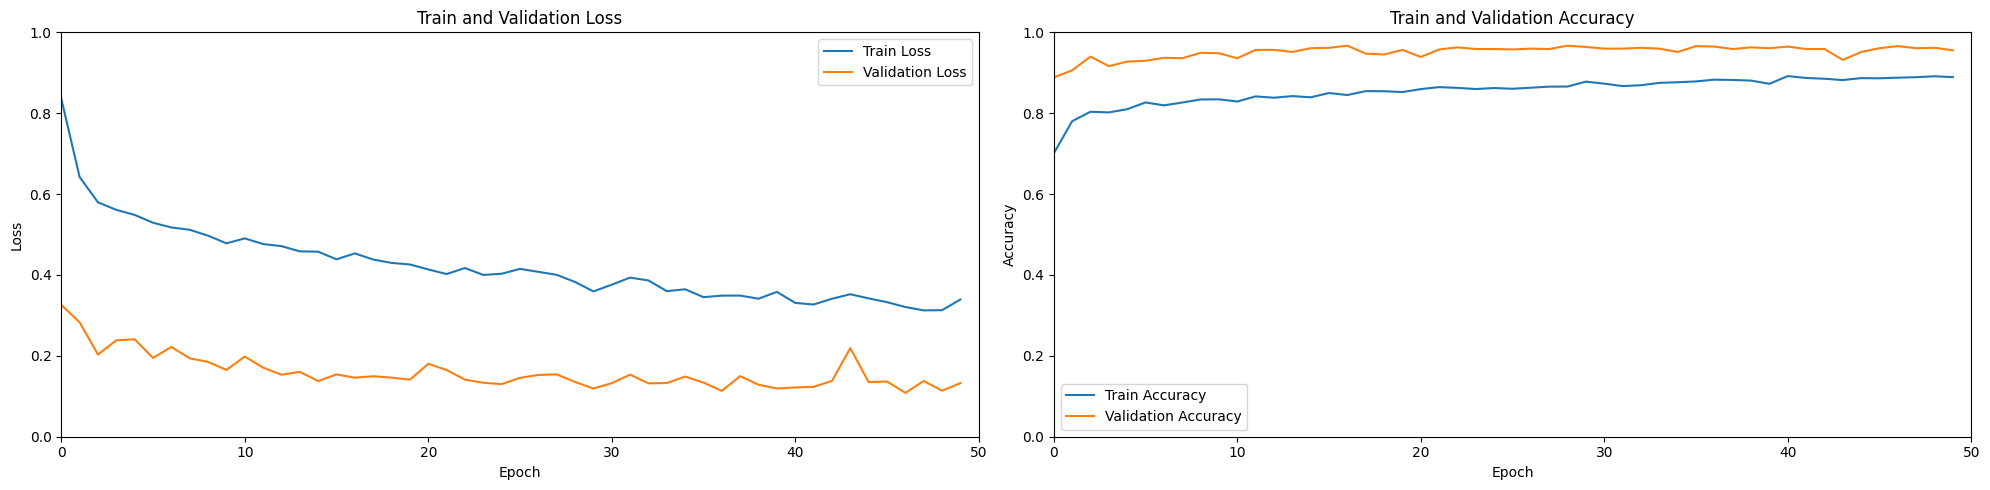

In [7]:
model_0.save('OCT_IRV2.keras')
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()
plt.tight_layout()

In [8]:
base_model_1 = InceptionV3(
    input_shape=(224, 224, 3), 
    include_top=False,             
    weights='imagenet',
    pooling='max'
) 

for layer in base_model_1.layers:
    layer.trainable = False

# Build model
inputs = base_model_1.input
x = BatchNormalization()(base_model_1.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(4, activation='softmax')(x)
model_1 = Model(inputs=inputs, outputs=outputs)

# Compile model
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Deal with class imbalances
class_weights = compute_class_weight(class_weight='balanced', classes = np.unique(train_image_generator.classes), y= train_image_generator.classes)
class_weight_dict = dict(enumerate(class_weights))
history_1 = model_1.fit(
    train_image_generator,
    epochs=50,
    steps_per_epoch=327,
    validation_data=test_image_generator,
    class_weight=class_weight_dict
)
model_1.save('OCT_IV3.keras')

Epoch 1/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - accuracy: 0.6792 - loss: 0.8949 - val_accuracy: 0.9070 - val_loss: 0.2816
Epoch 2/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.7939 - loss: 0.6286 - val_accuracy: 0.9122 - val_loss: 0.2662
Epoch 3/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8116 - loss: 0.5585 - val_accuracy: 0.9008 - val_loss: 0.2820
Epoch 4/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8192 - loss: 0.5545 - val_accuracy: 0.9029 - val_loss: 0.2652
Epoch 5/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - accuracy: 0.8206 - loss: 0.5324 - val_accuracy: 0.9411 - val_loss: 0.2102
Epoch 6/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.8360 - loss: 0.5160 - val_accuracy: 0.9380 - val_loss: 0.1953
Epoch 7/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.8307 - loss: 0.5041 - val_accuracy: 0.9401 - val_loss: 0.1892
Epoch 8/50
319/327 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8331 - loss: 0.5019

/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


327/327 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8330 - loss: 0.5017 - val_accuracy: 0.9390 - val_loss: 0.2067
Epoch 9/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8360 - loss: 0.4854 - val_accuracy: 0.9432 - val_loss: 0.1769
Epoch 10/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.8478 - loss: 0.4641 - val_accuracy: 0.9421 - val_loss: 0.1896
Epoch 11/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8486 - loss: 0.4795 - val_accuracy: 0.9504 - val_loss: 0.1510
Epoch 12/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.8400 - loss: 0.4597 - val_accuracy: 0.9473 - val_loss: 0.1711
Epoch 13/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 29s 89ms/step - accuracy: 0.8482 - loss: 0.4335 - val_accuracy: 0.9463 - val_loss: 0.1695
Epoch 14/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 38s 115ms/step - accuracy: 0.8543 - loss: 0.4191 - val_accuracy: 0.9174 - val_loss: 0.2218
Epoch 15/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 38s 115ms/step - accuracy: 0.8514 - loss: 0.4462 - val

2024-08-25 09:08:07.493801: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]


327/327 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.8618 - loss: 0.4151 - val_accuracy: 0.9463 - val_loss: 0.1727
Epoch 17/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8640 - loss: 0.4295 - val_accuracy: 0.9525 - val_loss: 0.1686
Epoch 18/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8638 - loss: 0.4203 - val_accuracy: 0.9360 - val_loss: 0.1919
Epoch 19/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8601 - loss: 0.4045 - val_accuracy: 0.9473 - val_loss: 0.1715
Epoch 20/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8730 - loss: 0.4027 - val_accuracy: 0.9525 - val_loss: 0.1305
Epoch 21/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8678 - loss: 0.3887 - val_accuracy: 0.9576 - val_loss: 0.1387
Epoch 22/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.8779 - loss: 0.3838 - val_accuracy: 0.9545 - val_loss: 0.1339
Epoch 23/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8749 - loss: 0.3710 - val_

2024-08-25 09:10:39.996995: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14748542202658744961
2024-08-25 09:10:39.997043: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16683299687234661557
2024-08-25 09:10:39.997104: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3271769976413865240


327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8799 - loss: 0.3779 - val_accuracy: 0.9566 - val_loss: 0.1382
Epoch 25/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8776 - loss: 0.3640 - val_accuracy: 0.9618 - val_loss: 0.1203
Epoch 26/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8774 - loss: 0.3665 - val_accuracy: 0.9680 - val_loss: 0.1238
Epoch 27/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8726 - loss: 0.3671 - val_accuracy: 0.9504 - val_loss: 0.1458
Epoch 28/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.8771 - loss: 0.3677 - val_accuracy: 0.9566 - val_loss: 0.1407
Epoch 29/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8860 - loss: 0.3420 - val_accuracy: 0.9690 - val_loss: 0.1202
Epoch 30/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.8893 - loss: 0.3307 - val_accuracy: 0.9628 - val_loss: 0.1228
Epoch 31/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8780 - loss: 0.3300 - val_

2024-08-25 09:13:08.686077: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14748542202658744961
2024-08-25 09:13:08.686118: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16683299687234661557
2024-08-25 09:13:08.686153: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3271769976413865240


327/327 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8852 - loss: 0.3413 - val_accuracy: 0.9576 - val_loss: 0.1377
Epoch 33/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.8868 - loss: 0.3341 - val_accuracy: 0.9700 - val_loss: 0.1081
Epoch 34/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.8980 - loss: 0.3192 - val_accuracy: 0.9711 - val_loss: 0.0972
Epoch 35/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.9041 - loss: 0.2911 - val_accuracy: 0.9669 - val_loss: 0.1246
Epoch 36/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.8924 - loss: 0.3279 - val_accuracy: 0.9690 - val_loss: 0.1039
Epoch 37/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.8970 - loss: 0.3195 - val_accuracy: 0.9607 - val_loss: 0.1276
Epoch 38/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8956 - loss: 0.3131 - val_accuracy: 0.9638 - val_loss: 0.1250
Epoch 39/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.8972 - loss: 0.2969 - val_

2024-08-25 09:15:44.332264: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14748542202658744961
2024-08-25 09:15:44.332301: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16683299687234661557
2024-08-25 09:15:44.332335: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3271769976413865240


327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8963 - loss: 0.2936 - val_accuracy: 0.9669 - val_loss: 0.1114
Epoch 41/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.9000 - loss: 0.2816 - val_accuracy: 0.9680 - val_loss: 0.1126
Epoch 42/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.9061 - loss: 0.2731 - val_accuracy: 0.9731 - val_loss: 0.0936
Epoch 43/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.9020 - loss: 0.2765 - val_accuracy: 0.9669 - val_loss: 0.0996
Epoch 44/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.9048 - loss: 0.2761 - val_accuracy: 0.9690 - val_loss: 0.0927
Epoch 45/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.9050 - loss: 0.2715 - val_accuracy: 0.9638 - val_loss: 0.0924
Epoch 46/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.9055 - loss: 0.2771 - val_accuracy: 0.9514 - val_loss: 0.1470
Epoch 47/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.9017 - loss: 0.2807 - val_

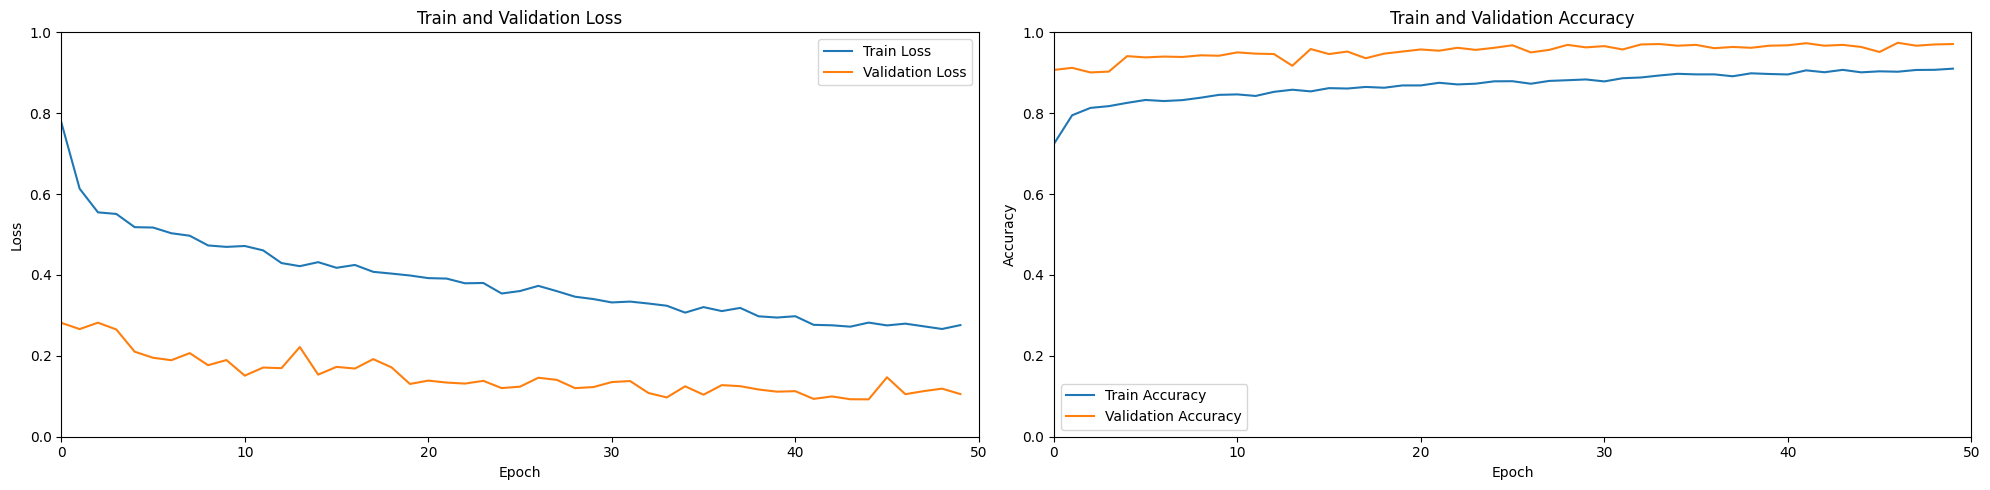

In [9]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history_1.history['loss'],label="Train Loss")
plt.plot(history_1.history['val_loss'], label="Validation Loss")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history_1.history['accuracy'], label="Train Accuracy")
plt.plot(history_1.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()
plt.tight_layout()

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint
base_model_2 = VGG16(
    input_shape=(224, 224, 3), 
    include_top=False,             
    weights='imagenet',
    pooling='max'
) 
for layer in base_model_2.layers:
    layer.trainable = False

# Build model
inputs = base_model_2.input
x = BatchNormalization()(base_model_2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(4, activation='softmax')(x)
model_2 = Model(inputs=inputs, outputs=outputs)

# Compile model
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Deal with class imbalances
class_weights = compute_class_weight(class_weight='balanced', classes = np.unique(train_image_generator.classes), y= train_image_generator.classes)
class_weight_dict = dict(enumerate(class_weights))

checkpoint_callback = ModelCheckpoint(
    'best_model_VGG16.keras',  
    save_best_only=True,      
    mode='min'                
)
history_2 = model_2.fit(
    train_image_generator,
    epochs=50,
    steps_per_epoch=327,
    validation_data=test_image_generator,
    callbacks=[checkpoint_callback],
    class_weight=class_weight_dict
)
model_2.save('OCT_VGG16.keras')

Epoch 1/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.6713 - loss: 0.8620 - val_accuracy: 0.9153 - val_loss: 0.3046
Epoch 2/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 94ms/step - accuracy: 0.7879 - loss: 0.6052 - val_accuracy: 0.9174 - val_loss: 0.2817
Epoch 3/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 94ms/step - accuracy: 0.8009 - loss: 0.5755 - val_accuracy: 0.9267 - val_loss: 0.2417
Epoch 4/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 94ms/step - accuracy: 0.8066 - loss: 0.5275 - val_accuracy: 0.9184 - val_loss: 0.2570
Epoch 5/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 94ms/step - accuracy: 0.8218 - loss: 0.5067 - val_accuracy: 0.8895 - val_loss: 0.2809
Epoch 6/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 94ms/step - accuracy: 0.8180 - loss: 0.5106 - val_accuracy: 0.9122 - val_loss: 0.2588
Epoch 7/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 32s 99ms/step - accuracy: 0.8245 - loss: 0.4979 - val_accuracy: 0.9380 - val_loss: 0.2092
Epoch 8/50
320/327 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8318 - loss: 0.4916

2024-08-25 11:01:34.637929: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14748542202658744961
2024-08-25 11:01:34.638258: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16683299687234661557
2024-08-25 11:01:34.638294: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3271769976413865240
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


327/327 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.8318 - loss: 0.4913 - val_accuracy: 0.9349 - val_loss: 0.2270
Epoch 9/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8373 - loss: 0.4690 - val_accuracy: 0.9112 - val_loss: 0.2388
Epoch 10/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8478 - loss: 0.4673 - val_accuracy: 0.9411 - val_loss: 0.1922
Epoch 11/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8479 - loss: 0.4380 - val_accuracy: 0.9525 - val_loss: 0.1853
Epoch 12/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8598 - loss: 0.4297 - val_accuracy: 0.9287 - val_loss: 0.2170
Epoch 13/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.8413 - loss: 0.4324 - val_accuracy: 0.9618 - val_loss: 0.1594
Epoch 14/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.8571 - loss: 0.4147 - val_accuracy: 0.9442 - val_loss: 0.1426
Epoch 15/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8531 - loss: 0.4127 - val_a

2024-08-25 11:05:43.406015: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14748542202658744961
2024-08-25 11:05:43.406039: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16683299687234661557
2024-08-25 11:05:43.406049: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3271769976413865240


327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 93ms/step - accuracy: 0.8636 - loss: 0.4079 - val_accuracy: 0.9525 - val_loss: 0.1729
Epoch 17/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.8577 - loss: 0.4049 - val_accuracy: 0.9390 - val_loss: 0.1842
Epoch 18/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8599 - loss: 0.3969 - val_accuracy: 0.9246 - val_loss: 0.2087
Epoch 19/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8683 - loss: 0.3911 - val_accuracy: 0.9411 - val_loss: 0.1677
Epoch 20/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8712 - loss: 0.3764 - val_accuracy: 0.9432 - val_loss: 0.1764
Epoch 21/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8808 - loss: 0.3555 - val_accuracy: 0.9411 - val_loss: 0.1751
Epoch 22/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8719 - loss: 0.3838 - val_accuracy: 0.9535 - val_loss: 0.1539
Epoch 23/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8686 - loss: 0.3811 - val_

2024-08-25 11:09:52.337078: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14748542202658744961
2024-08-25 11:09:52.337121: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16683299687234661557
2024-08-25 11:09:52.337147: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3271769976413865240


327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 93ms/step - accuracy: 0.8701 - loss: 0.3661 - val_accuracy: 0.9556 - val_loss: 0.1520
Epoch 25/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.8704 - loss: 0.3667 - val_accuracy: 0.9432 - val_loss: 0.1612
Epoch 26/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8822 - loss: 0.3388 - val_accuracy: 0.9576 - val_loss: 0.1567
Epoch 27/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8841 - loss: 0.3444 - val_accuracy: 0.9556 - val_loss: 0.1511
Epoch 28/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8766 - loss: 0.3455 - val_accuracy: 0.9576 - val_loss: 0.1633
Epoch 29/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.8733 - loss: 0.3473 - val_accuracy: 0.9669 - val_loss: 0.1380
Epoch 30/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.8852 - loss: 0.3291 - val_accuracy: 0.9659 - val_loss: 0.1256
Epoch 31/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8804 - loss: 0.3393 - val_

2024-08-25 11:14:01.823037: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14748542202658744961
2024-08-25 11:14:01.823066: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16683299687234661557
2024-08-25 11:14:01.823077: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3271769976413865240


327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 94ms/step - accuracy: 0.8895 - loss: 0.3053 - val_accuracy: 0.9618 - val_loss: 0.1132
Epoch 33/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.8858 - loss: 0.3116 - val_accuracy: 0.9669 - val_loss: 0.1196
Epoch 34/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8953 - loss: 0.2915 - val_accuracy: 0.9628 - val_loss: 0.1202
Epoch 35/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8831 - loss: 0.3163 - val_accuracy: 0.9607 - val_loss: 0.1210
Epoch 36/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.8908 - loss: 0.3096 - val_accuracy: 0.9690 - val_loss: 0.1021
Epoch 37/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.8934 - loss: 0.2992 - val_accuracy: 0.9711 - val_loss: 0.1020
Epoch 38/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8996 - loss: 0.3013 - val_accuracy: 0.9597 - val_loss: 0.1418
Epoch 39/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8981 - loss: 0.3090 - val_

2024-08-25 11:18:11.824380: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14748542202658744961
2024-08-25 11:18:11.824415: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16683299687234661557


327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 94ms/step - accuracy: 0.8999 - loss: 0.2866 - val_accuracy: 0.9638 - val_loss: 0.1262
Epoch 41/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.8951 - loss: 0.3014 - val_accuracy: 0.9525 - val_loss: 0.1428
Epoch 42/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.8996 - loss: 0.2792 - val_accuracy: 0.9669 - val_loss: 0.1094
Epoch 43/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.8957 - loss: 0.3014 - val_accuracy: 0.9721 - val_loss: 0.0903
Epoch 44/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.9091 - loss: 0.2432 - val_accuracy: 0.9690 - val_loss: 0.1274
Epoch 45/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.9081 - loss: 0.2581 - val_accuracy: 0.9669 - val_loss: 0.1132
Epoch 46/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.9134 - loss: 0.2588 - val_accuracy: 0.9721 - val_loss: 0.0997
Epoch 47/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 96ms/step - accuracy: 0.9086 - loss: 0.2608 - val_

2024-08-25 11:22:21.574884: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14748542202658744961
2024-08-25 11:22:21.574923: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16683299687234661557
2024-08-25 11:22:21.574946: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3271769976413865240


327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 94ms/step - accuracy: 0.9109 - loss: 0.2637 - val_accuracy: 0.9628 - val_loss: 0.1119
Epoch 49/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.9124 - loss: 0.2496 - val_accuracy: 0.9649 - val_loss: 0.1332
Epoch 50/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.9142 - loss: 0.2461 - val_accuracy: 0.9659 - val_loss: 0.1216


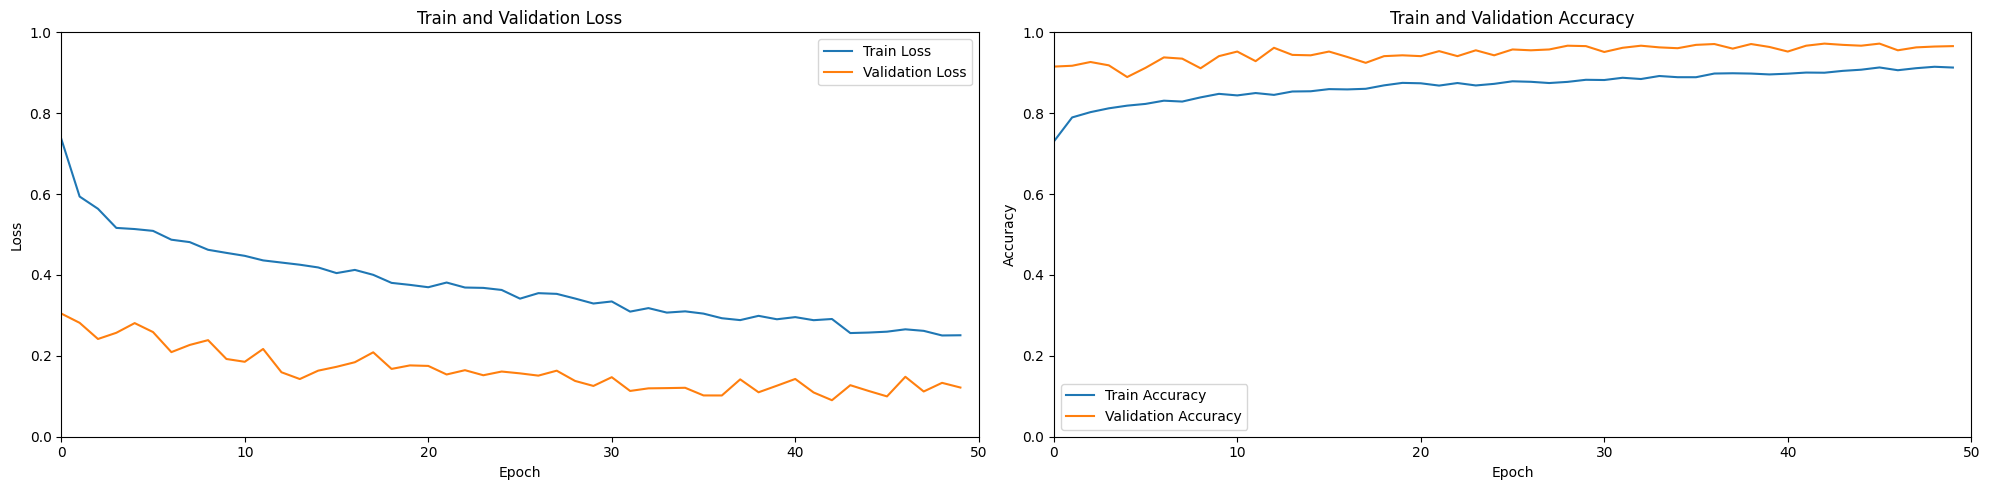

In [21]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history_2.history['loss'],label="Train Loss")
plt.plot(history_2.history['val_loss'], label="Validation Loss")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history_2.history['accuracy'], label="Train Accuracy")
plt.plot(history_2.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()
plt.tight_layout()

In [1]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import tensorflow as tf
import numpy as np
import itertools
from scipy import stats

# Paths and parameters
test_path = 'OCT/test'
img_size = (224, 224)  # Example image size, replace with your model's input size
batch_size = 32 # Example batch size, replace as necessary

# Function to normalize images
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the image to [0,1]
    return image, label

# Load test dataset with normalization
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    seed=42
).map(preprocess_image)  # Apply hh using map function

# List of your models
model_paths = ['OCT_IRV2.keras', 'OCT_IV3.keras', 'best_model_VGG16.keras']  # Replace with your actual file paths
models = [tf.keras.models.load_model(model_path) for model_path in model_paths]

# Initialize lists to collect true labels and predictions
labels = []
ensemble_predictions = []

# Loop over the test dataset
for x, y in test_dataset:
    labels.append(list(y.numpy().astype("uint8")))
    
    # Collect predictions from all models
    batch_predictions = []
    for model in models:
        preds = model.predict(x)
        batch_predictions.append(np.argmax(preds, axis=1))
    
    # Stack predictions and perform majority voting
    batch_predictions = np.array(batch_predictions)  # Shape (num_models, batch_size)
    ensemble_pred_classes = stats.mode(batch_predictions, axis=0)[0].flatten()
    ensemble_predictions.append(ensemble_pred_classes)

# Flatten lists of labels and predictions
predictions = list(itertools.chain.from_iterable(ensemble_predictions))
labels = list(itertools.chain.from_iterable(labels))

# Calculate and print metrics
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))
print("F1 score        : {:.2f}".format(f1_score(labels, predictions, average='micro')))

# Optional: Confusion matrix
conf_matrix = confusion_matrix(labels, predictions)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_report(labels, predictions))


2024-08-25 11:27:28.860228: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-25 11:27:28.987831: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-25 11:27:29.041980: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-25 11:27:29.058262: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-25 11:27:29.150512: I tensorflow/core/platform/cpu_feature_guar

Found 968 files belonging to 4 classes.


I0000 00:00:1724565452.498522  136768 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724565452.601657  136768 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724565452.603280  136768 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724565452.605680  136768 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


I0000 00:00:1724565472.036005  137034 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━

2024-08-25 11:28:22.632859: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5381', 4 bytes spill stores, 4 bytes spill loads

2024-08-25 11:28:22.805256: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5395', 8 bytes spill stores, 8 bytes spill loads

2024-08-25 11:28:23.105840: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5388', 8 bytes spill stores, 8 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Test Accuracy   : 98.86 %
Precision Score : 98.86 %
Recall Score    : 98.86 %
F1 score        : 0.99
Confusion Matrix:
 [[240   2   0   0]
 [  1 238   1   2]
 [  1   2 237   2]
 [  0   0   0 242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       242
           1       0.98      0.98      0.98       242
           2       1.00      0.98      0.99       242
           3       0.98      1.00      0.99       242

    accuracy                           0.99       968
   macro avg       0.99      0.99      0.99       968
weighted avg       0.99      0.99      0.99       968



2024-08-25 11:28:36.644957: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


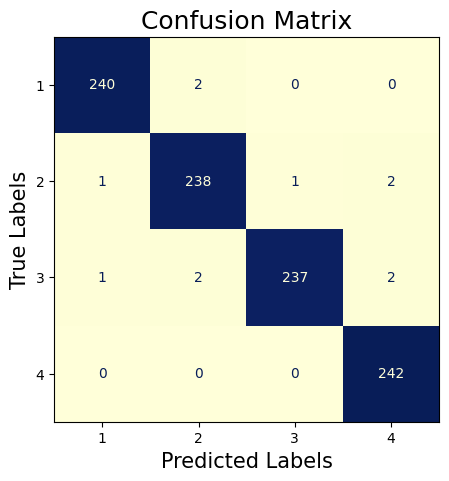

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, predictions)

class_accuracy = cm.diagonal() / cm.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1, 5)))
disp.plot(ax=ax, colorbar=False, cmap='YlGnBu')

# Set font sizes for labels and title
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel('Predicted Labels', fontsize=15)
plt.ylabel('True Labels', fontsize=15)

plt.show()

In [10]:
def get_results(model):
    labels = []
    predictions = []
    for x,y in test_dataset:
        labels.append(list(y.numpy().astype("uint8")))
        predictions.append(tf.argmax(model.predict(x),1).numpy().astype("uint8"))
    import itertools
    predictions = list(itertools.chain.from_iterable(predictions))
    labels = list(itertools.chain.from_iterable(labels))
    print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
    print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
    print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))
    print('F1 score:', f1_score(labels, predictions, average='micro'))
    cm = confusion_matrix(labels, predictions)

    class_accuracy = cm.diagonal() / cm.sum(axis=1)

    fig, ax = plt.subplots(figsize=(5, 5))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1, 5)))
    disp.plot(ax=ax, colorbar=False, cmap='YlGnBu')

    # Set font sizes for labels and title
    plt.title("Confusion Matrix", fontsize=18)
    plt.xlabel('Predicted Labels', fontsize=15)
    plt.ylabel('True Labels', fontsize=15)

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━

2024-08-25 11:54:15.195357: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


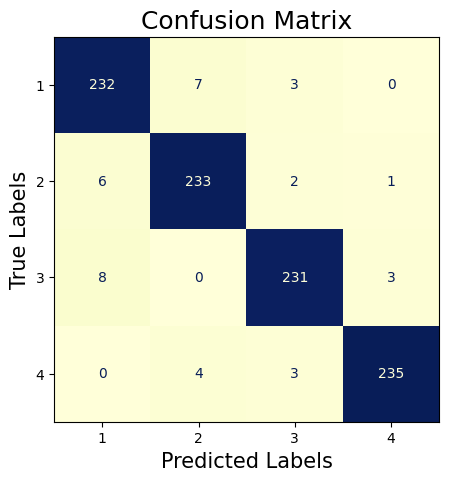

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━

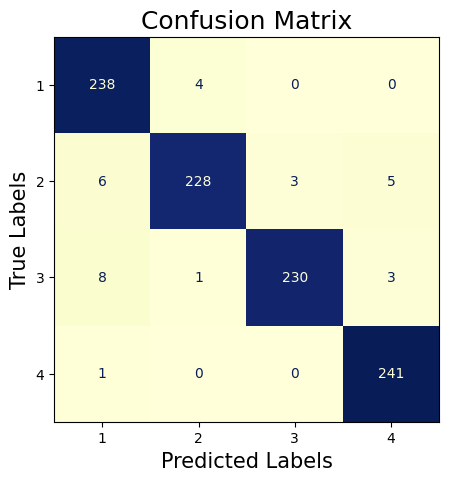

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

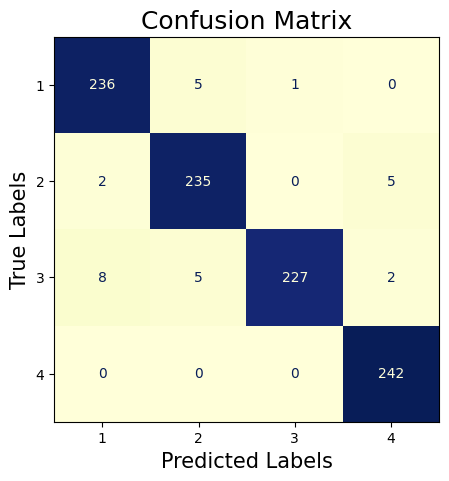

In [11]:
for model in models:
    get_results(model)